# notes from the lecture

## knowledge-based agents
agents that reason by operating on internal representations of knowledge

## sentence
an assertion about the world in a knowledge representation knowledge

## propositional logic
### proposition symbols
*P Q R*
### logical connectives
*¬ not   ^ and  v or  -> implication  <-> biconditional*

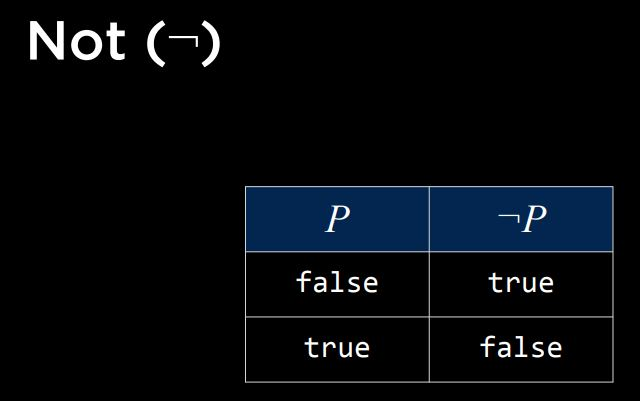

In [8]:
from IPython.display import Image
Image(filename='not_truth_table.jpg') 

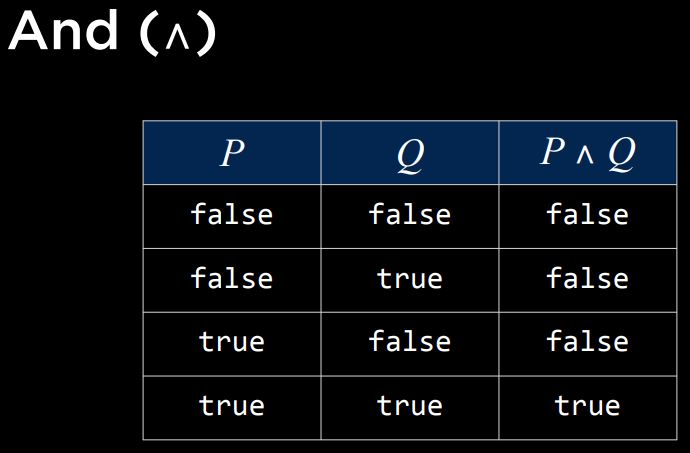

In [10]:
from IPython.display import Image
Image(filename='and_truth_table.jpg') 

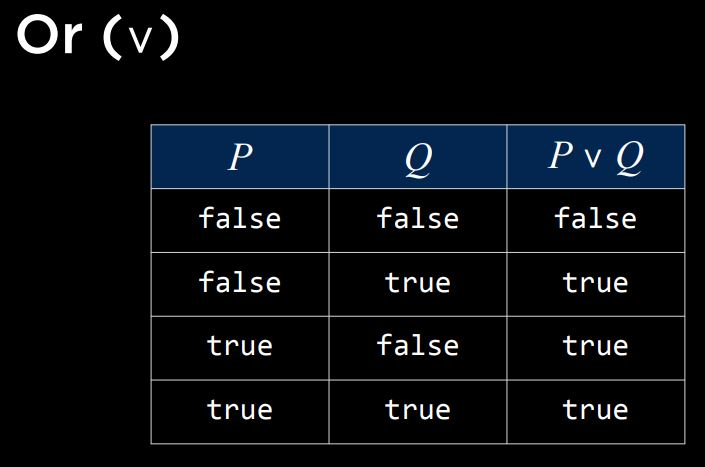

In [12]:
from IPython.display import Image
Image(filename='or_truth_table.jpg') 

### P or Q or either both!! (not only P or only Q => exclusivity)

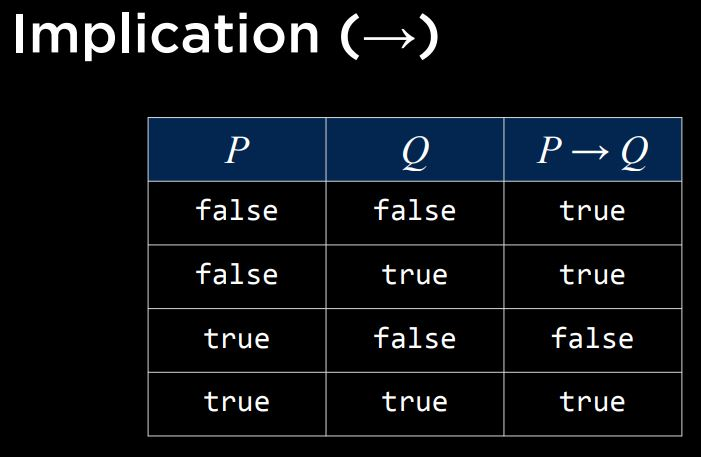

In [15]:
from IPython.display import Image
Image(filename='implication_truth_table.jpg') 

### *P -> Q: If it is raining, then I will be indoors.*
### *P True: if it rains*
##### *Q True: I am inside (the conditions are met, looks like implication is true)*
##### *Q False: I am outside (it rains but I am outside, it looks like implication is false)*
### *P False: if does not rain* 
##### *I did not test, it looks like implication is true*

### P implies Q: if P is true, then Q is also true
If it is raining, then I will be indoors. Meaning it is raining implies I will be indoors.
### if P is true and Q is false, then the statement is false because it does not imply
If it is raining, then I will be indoors, and it is raining, but I'm not indoors, well, then it would seem to be that my original statement was not true. P implies Q means that if P is true, then Q also needs to be true. And if it's not, well, then the statement is false. 
### if P is false and Q is true
When P is false, the implication makes no claim at all. If I say something like, if it is raining, then I will be indoors, and it turns out it's not raining, then in that case, I am not making any statement as to whether or not I will be indoors or not. P implies Q just means that if P is true, Q must be true. But if P is not true, then we make no claim about whether or not Q is true at all.
#### So in either case, if P is false, it doesn't matter what Q is, whether it's false or true. We're not making any claim about Q whatsoever. We can still evaluate the implication to true. 
#### The only way that the implication is ever false is if our premise, P is true, but the conclusion that we're drawing, Q, happens to be false. So in that case, we would say P does not imply Q in that case. 

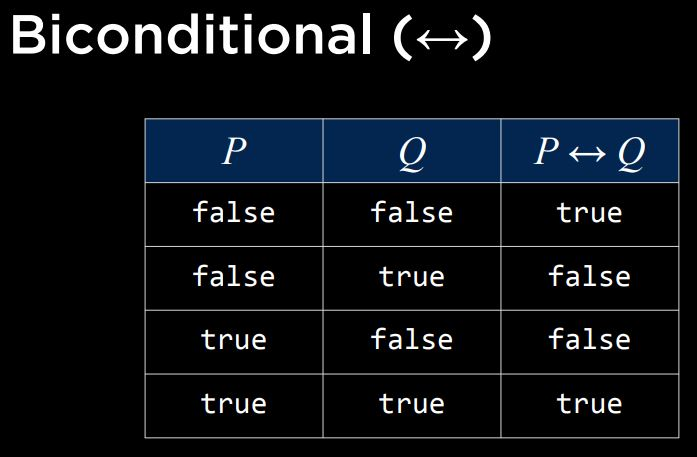

In [23]:
from IPython.display import Image
Image(filename='biconditional_truth_table.jpg') 

### biconditional: if and only if

### *P <-> Q: If it is raining, I will be indoors. If it does not rain, I will be outdoors.*
### *P True: if it rains*
##### *Q True: I am inside (biconditional is true)*
##### *Q False: I am outside (biconditional is false)*
### *P False: if does not rain*
##### *Q True: I am inside (biconditional is false)*
##### *Q False: I am outside (biconditional is true)*

## model
assignment of a truth value to every propositional symbol (a "possible world")
*P: It is raining.*

*Q: It is a Tuesday.*

{P = true, Q = false}

when *n* is the number of symbols, there are 2 to the n (2^n) possibilities

## knowledge base
a set of sentences known by a knowledge-based agent

## notion of entailment
*α ⊨ β*

*α entails β*

In every model in which sentence *α* is true, sentence *β* is also true.

## inference
the process of deriving new sentences from old ones

*P: It is a Tuesday.*

*Q: It is raining.*

*R: Harry will go for a run.*

KB: 

(P ∧ ¬Q) → R 

P 

¬Q

Knowledge Base says P and not Q implies R.
So the way to read this entire sentence in human natural language at least, is if it is a Tuesday and it is not raining, then Harry will go for a run. So if it is a Tuesday and it is not raining, then Harry will go for a run. And that is now inside of our knowledge base.
Our knowledge base has two other pieces of information as well. It has information that P is true, that it is a Tuesday. And we also have the information not Q, that it is not raining. That this sentence Q, it is raining, happens to be false. 
The definition of implication is if this whole thing on the left is true, then this thing on the right must also be true. So if we know that P and not Q is true, then R must be true as well. 
So the inference we should be able to draw from all of this is that R is true, and we know that Harry will go for a run, by taking this knowledge inside of our knowledge base and being able to reason based on that idea.
Inference: R

## inference algorithm
Does

*KB ⊨ α*

?

Given some query about the world, something we're wondering about the world, and we'll call that query alpha, the question we want to ask, using these inference algorithms, is does it KB, our knowledge base, entail alpha? In other words, using only the information we know inside of our knowledge base, the knowledge that we have access to, can we conclude that this sentence alpha is true? And that's ultimately what we would like to do.

## model checking
A model is just some assignment of all of the propositional symbols inside of our language to a truth value, true or false. And you can think of a model as a possible world. That there are many possible worlds where different things might be true or false. And we can enumerate all of them. And the model checking algorithm does exactly that. 

To determine if KB ⊨ α:
- Enumerate all possible models.
- If in every model where KB is true, α is true, then KB entails α.
- Otherwise, KB does not entail α.

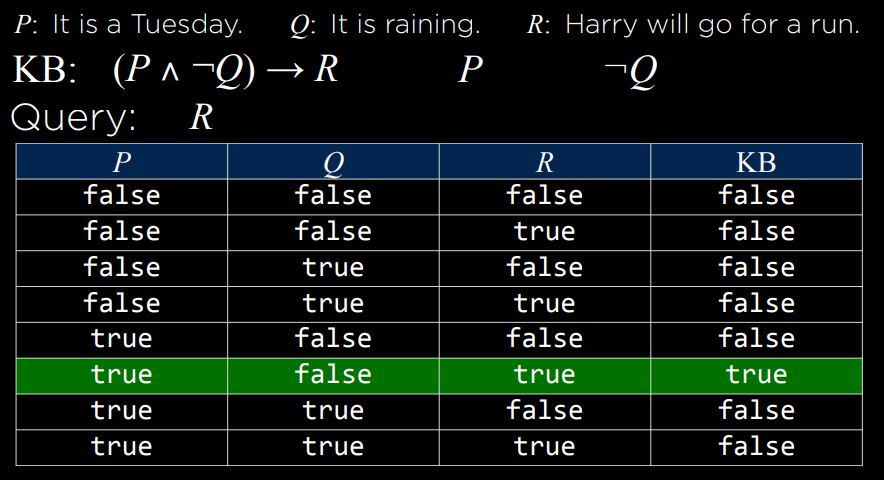

In [42]:
from IPython.display import Image
Image(filename='model.jpg') 

In [46]:
!type logic.py
''# !cat logic.py

import itertools


class Sentence():

    def evaluate(self, model):
        """Evaluates the logical sentence."""
        raise Exception("nothing to evaluate")

    def formula(self):
        """Returns string formula representing logical sentence."""
        return ""

    def symbols(self):
        """Returns a set of all symbols in the logical sentence."""
        return set()

    @classmethod
    def validate(cls, sentence):
        if not isinstance(sentence, Sentence):
            raise TypeError("must be a logical sentence")

    @classmethod
    def parenthesize(cls, s):
        """Parenthesizes an expression if not already parenthesized."""
        def balanced(s):
            """Checks if a string has balanced parentheses."""
            count = 0
            for c in s:
                if c == "(":
                    count += 1
                elif c == ")":
                    if count <= 0:
                        return False
                    count -= 1
           

```shell
        # If model has an assignment for each symbol
        if not symbols:

            # If knowledge base is true in model, then query must also be true
            if knowledge.evaluate(model):
                return query.evaluate(model)
            return True
```


In all worlds where the knowledge is true, the query must also be true. 

Otherwise, we can just return true, because if the knowledge isn't true, then we don't care. 

This is equivalent to when we were enumerating this table from a moment ago. In all situations where the knowledge base wasn't true-- all of these seven rows here-- we didn't care whether or not our query was true or not. We only care to check whether the query is true when the knowledge base is actually true, which was just this green highlighted row right there. 

```shell
        else:

            # Choose one of the remaining unused symbols
            remaining = symbols.copy()
            p = remaining.pop()

            # Create a model where the symbol is true
            model_true = model.copy()
            model_true[p] = True

            # Create a model where the symbol is false
            model_false = model.copy()
            model_false[p] = False

            # Ensure entailment holds in both models
            return (check_all(knowledge, query, remaining, model_true) and
                    check_all(knowledge, query, remaining, model_false))
```
If we haven't assigned symbols yet, which we haven't seen anything yet, then the first thing we do is pop one of the symbols. I make a copy of the symbols first, just to save an existing copy. But I pop one symbol off of the remaining symbols, so that I just pick one symbol at random. And I create one copy of the model where that symbol is true, and I create a second copy of the model where that symbol is false. 

So I now have two copies of the model. One where the symbol is true, and one where the symbol is false. And I need to make sure that this entailment holds in both of those models. So I recursively check all on the model where the statement is true, and check all on the model where the statement is false. And on every level of the recursion we're saying, let's pick a new symbol that we haven't yet assigned. 

Ultimately, I need to check every possible world. I need to take every combination of symbols and try every combination of true and false in order to figure out whether the entailment relation actually holds. 

### knowledge engineering
If confronted with a problem where some sort of logical deduction can be used in order to try to solve it, you might try thinking about what propositional symbols you might need in order to represent that information. And what statements and propositional logic you might use in order to encode that information which you know. 

And this process of trying to take a problem and figure out what propositional symbols to use in order to encode that idea, or how to represent it logically is known as knowledge engineering.

#### one propositional symbols for each of these ideas

Propositional Symbols:
* mustard
* plum
* scarlet
* ballroom
* kitchen
* library
* knife
* revolver
* wrench

(mustard v plum v scarlet)

(ballroom v kitchen v library)

(knife v revolver v wrench)

¬plum (because the card is in me so not in the envelope)

(¬mustard v ¬library v ¬revolver) (someone asked this and that was not the answer) (one or two of them are not right)


In [57]:
!type clue.py
''# !cat clue.py

import termcolor

from logic import *

mustard = Symbol("ColMustard")
plum = Symbol("ProfPlum")
scarlet = Symbol("MsScarlet")
characters = [mustard, plum, scarlet]

ballroom = Symbol("ballroom")
kitchen = Symbol("kitchen")
library = Symbol("library")
rooms = [ballroom, kitchen, library]

knife = Symbol("knife")
revolver = Symbol("revolver")
wrench = Symbol("wrench")
weapons = [knife, revolver, wrench]

symbols = characters + rooms + weapons


def check_knowledge(knowledge):
    for symbol in symbols:
        if model_check(knowledge, symbol):
            termcolor.cprint(f"{symbol}: YES", "green")
        elif not model_check(knowledge, Not(symbol)):
            print(f"{symbol}: MAYBE")


# There must be a person, room, and weapon.
knowledge = And(
    Or(mustard, plum, scarlet),
    Or(ballroom, kitchen, library),
    Or(knife, revolver, wrench)
)

# Initial cards
knowledge.add(And(
    Not(mustard), Not(kitchen), Not(revolver)
))

# Unknown card
knowledge.add(Or(
    Not(scarlet), N

''

#### sometimes the propositional symbols are going to get a little more complex
Something like Gildaroy, Minerva, Pomona, and Horace each belong to a different one of the four houses-- Gryffindor, Hufflepuff, Ravenclaw, and Slytherin.

##### every propositional symbol is either true or false.
So Gildaroy Gryffindor is either true or false. Either he's in Gryffindor or he is not. Likewise, Gildaroy Hufflepuff also true or false. Either it is true or it's false. And that's true for every combination of person and house that we could come up with.

before even think about the information we were given, we can think about the premise of the problem. That every person is assigned to a different house. => implication for person to not another house

for all four people and for all combinations of houses

the information that each person is in a different house => implication for house to not another person

```Shell
# Only one house per person.
for person in people:
    for h1 in houses:
        for h2 in houses:
            if h1 != h2:
                knowledge.add(
                    Implication(Symbol(f"{person}{h1}"), Not(Symbol(f"{person}{h2}")))
                )

# Only one person per house.
for house in houses:
    for p1 in people:
        for p2 in people:
            if p1 != p2:
                knowledge.add(
                    Implication(Symbol(f"{p1}{house}"), Not(Symbol(f"{p2}{house}")))
```

#### no person belongs to multiple houses

I'll loop over every person. And then I need to loop over all different pairs of houses. The idea is I want to encode the idea that if Minerva is in Gryffindor, then Minerva can't be in Ravenclaw. So I'll loop over all houses, h1. And I'll loop over all houses again, h2. And as long as they're different, h1 not equal to H2, then I'll add to my knowledge base this piece of information. That implication, in other words, an if/then, if the person is in h1, then I know that they are not in house h2. So these lines here are encoding the notion that for every person, if they belong to house one, then they are not in house two. 

#### every house can only have one person

That's the same logic but sort of backwards. I loop over all of the houses, and loop over all different pairs of people. So I loop over people once, loop over people again. And only do this when the people are different, p1 not equal to p2. And I add the knowledge that if, as given by the implication, if person one belongs to the house, then it is not the case that person two belongs to the same house. 